# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# loading the dataset
data = pd.read_csv("used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3454 rows and 15 columns.


In [4]:
# let's view a sample of the data
data.sample(
    10, random_state=2)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1207,HTC,Android,12.70,no,no,8.0,5.0,32.0,4.0,2100.0,160.00,2014,1044,4.258446,5.247287
143,Samsung,Android,20.32,yes,no,5.0,2.0,16.0,1.5,4200.0,313.00,2015,909,4.326117,5.348202
3202,Huawei,Android,16.69,yes,yes,10.5,16.0,128.0,8.0,4000.0,178.00,2020,221,4.856474,6.152456
1127,Honor,Android,10.29,no,no,8.0,2.0,32.0,4.0,1730.0,159.00,2015,894,3.883006,4.248209
2926,Xiaomi,Android,14.83,yes,no,13.0,8.0,64.0,4.0,3000.0,150.00,2018,446,4.661551,5.131672
1726,LG,Android,7.67,no,no,2.0,1.3,16.0,4.0,1540.0,140.45,2014,952,3.384051,4.116595
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.00,2019,316,4.555244,4.602166
3273,Sony,Android,15.37,yes,yes,NaN,8.0,256.0,8.0,4000.0,181.40,2020,236,5.483427,6.839637
1411,Others,Others,19.94,no,no,5.0,2.0,32.0,4.0,4450.0,384.00,2014,767,4.368054,5.140552
551,Alcatel,Android,10.29,no,no,5.0,0.3,16.0,4.0,1800.0,157.00,2013,921,3.937496,4.603669


* Main_camera_mp has some missing values. We will investigate all columns further and check for missing values

* Columns are formatted correctly

In [5]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

In [6]:
# checking for duplicate values in the data
df.duplicated().sum()

0

* There are no duplicate values in the data

In [7]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float* and *int* type) and  4 string (*object* type) columns in the data.
* Main_camera_mp, selfie_camera_map, int_memory, ram, battery, and weight weight column have missing data. But not many.

In [8]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


* Most common OS is Android
* Most devices have 4G
* Devices differ greatly in terms of int_memory, ram, battery, and weight
* Devices were released between 2013 and 2020
* The mean normalized_used_price is less than the normalized_new_price. This makes sense since devices which are used diminish in value.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Q1) What does the distribution of normalized used device prices look like?

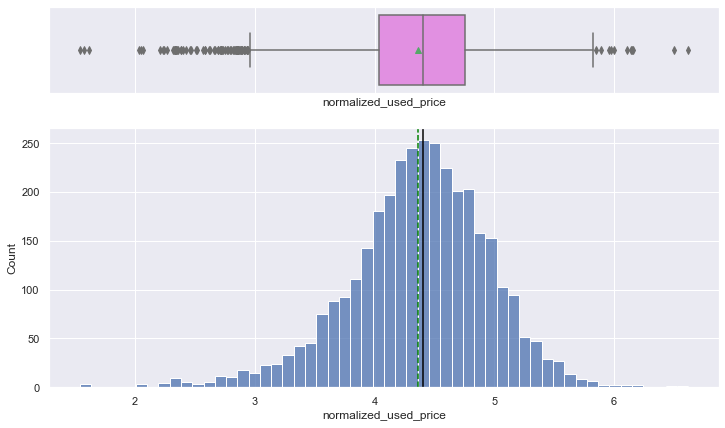

In [11]:
histogram_boxplot(df,"normalized_used_price")

#### Observations:
* Used device price is normally distributed with a slight left tail.
* There are outliers on both ends of the box plot, especially on the left side.

#### Normalized new price

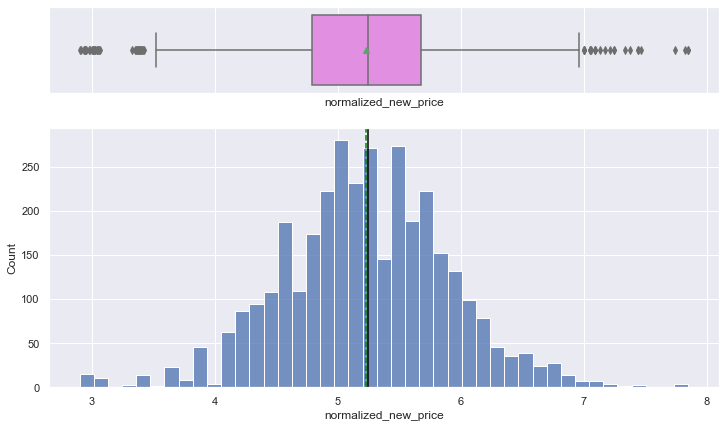

In [12]:
histogram_boxplot(df,'normalized_new_price')

#### Observations:
* Used device price is normally distributed.
* There are outliers on both ends of the box plot.

#### Days used

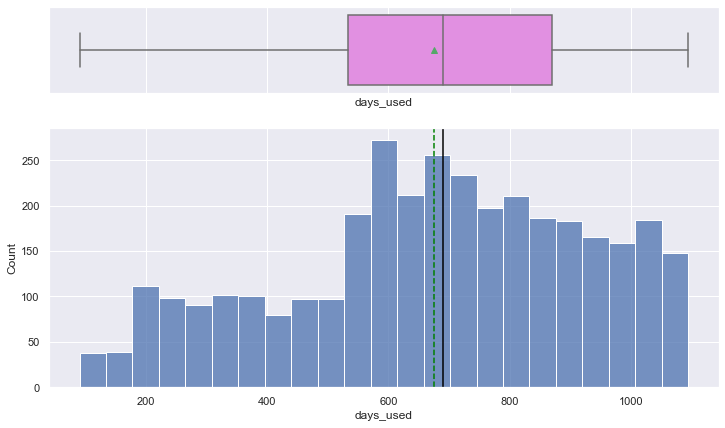

In [13]:
histogram_boxplot(df,'days_used')

#### Observations:
* The median days used is around 700
* Distribution is slightly left skewed.
* There are no outliers

#### Release year

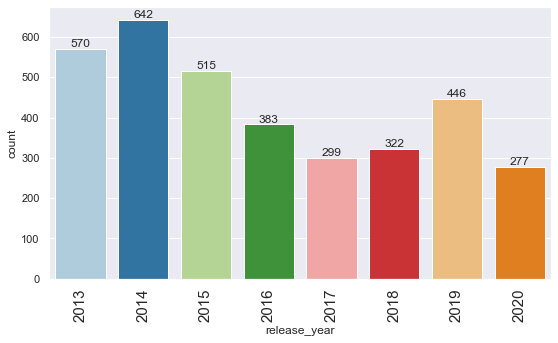

In [14]:
labeled_barplot(df,"release_year")

#### Observations:
* Most devices were released in 2014
* 2020 had the fewest amount of releases

#### Weight

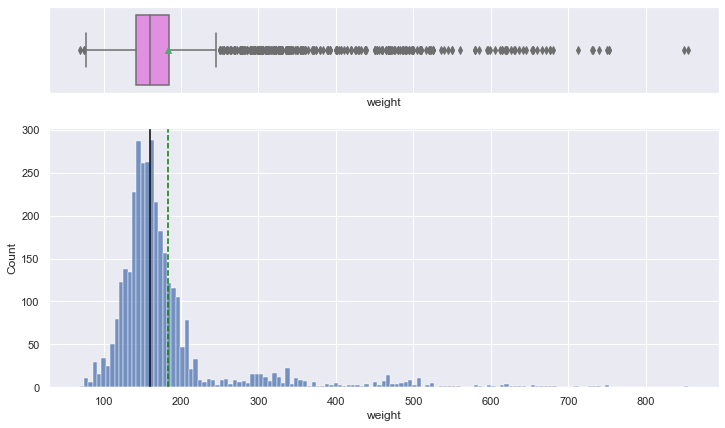

In [15]:
histogram_boxplot(df,"weight")

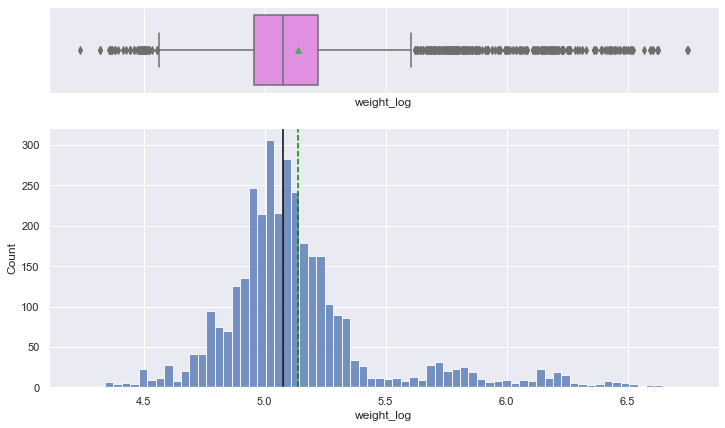

In [16]:
#log transformation to normalize distribution

df["weight_log"] = np.log(df["weight"])
histogram_boxplot(df,"weight_log")

#### Observations:
* Weight distribution is right skewed.
* There are outliers on both ends of the boxplot. Especially on the right end.

#### Battery

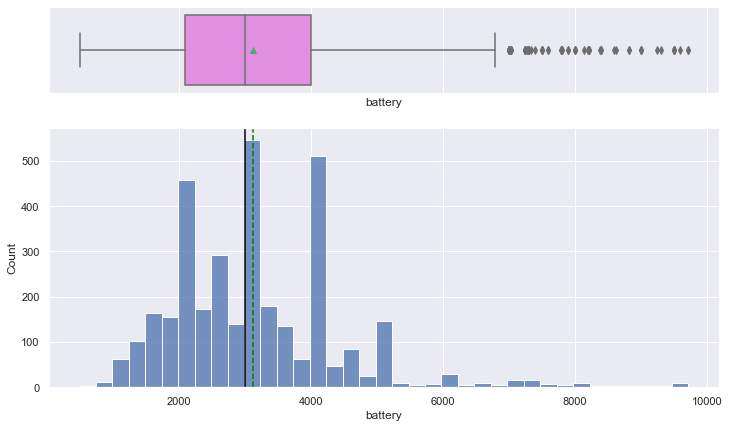

In [17]:
histogram_boxplot(df,'battery')

#### Observations:
* Median battery is around 3000 mAh.
* Battery distribution is right skewed.
* There are outliers on the right end.

#### Ram

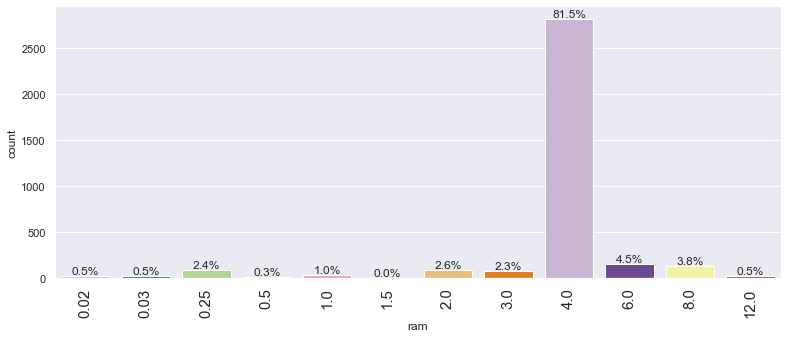

In [18]:
labeled_barplot(df,"ram",True)

#### Observations:
* 81.5% of devices use a 4.0 ram

#### Internal memory

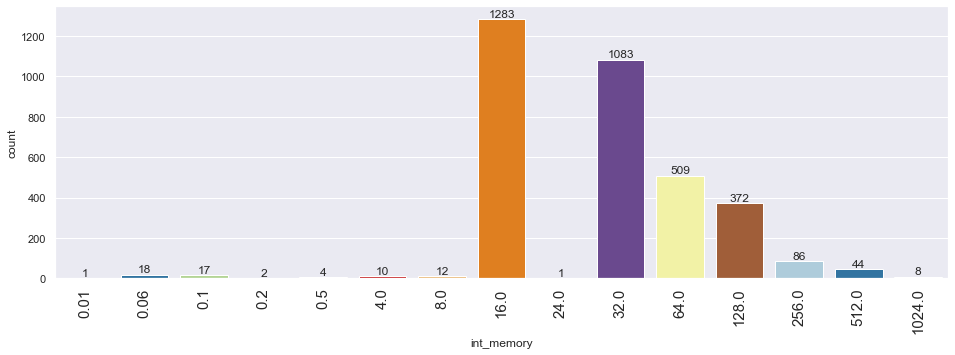

In [19]:
labeled_barplot(df,'int_memory')

#### Observations:
* Devices are typically using a internal memory of 16.0 or 32.0

#### Selfie camera mp

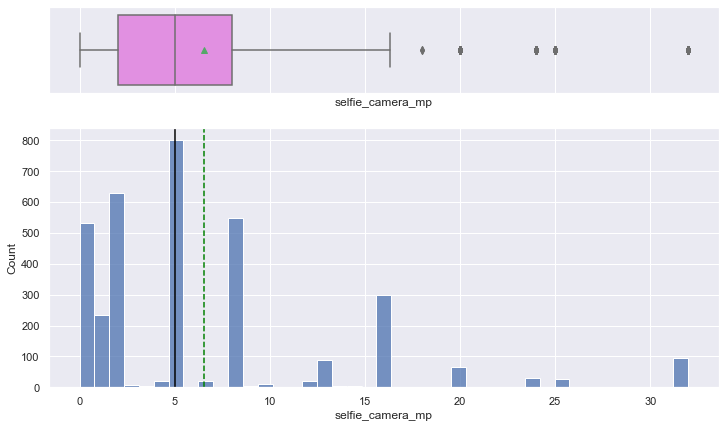

In [20]:
histogram_boxplot(df,"selfie_camera_mp")

#### Observations:
* The median front camera is around 5 megapixels
* The distribution is right skewed.
* There are outliers on the right end.

#### Main camera mp

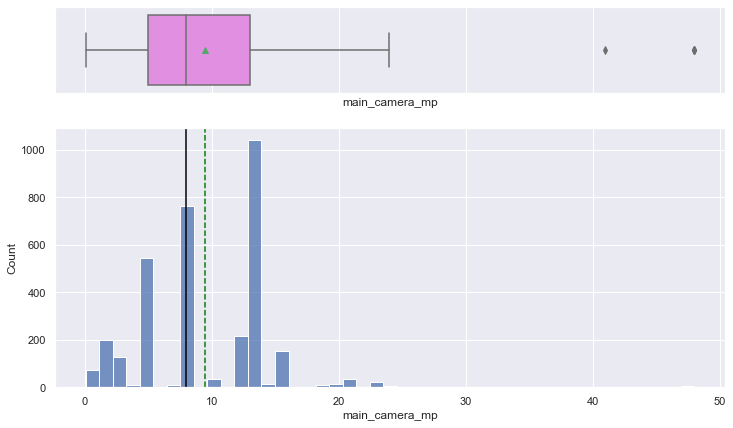

In [21]:
histogram_boxplot(df,"main_camera_mp")

#### Observations:
* The median main camera is around 8 megapixels
* The distribution is right skewed.
* There are outliers on the right end.

#### 5G

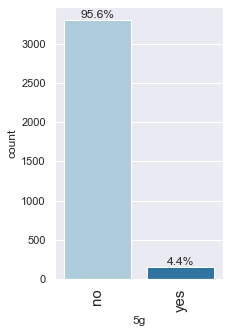

In [22]:
labeled_barplot(df,"5g",True)

#### Observations:
* Only 4.4% of devices use 5G

#### 4G

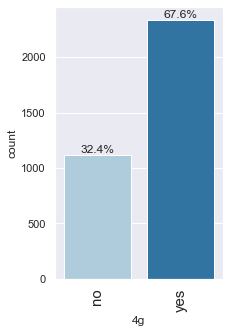

In [23]:
labeled_barplot(df,"4g",True)

#### Observations:
* 67.6% of devices use 4G

#### Screen size

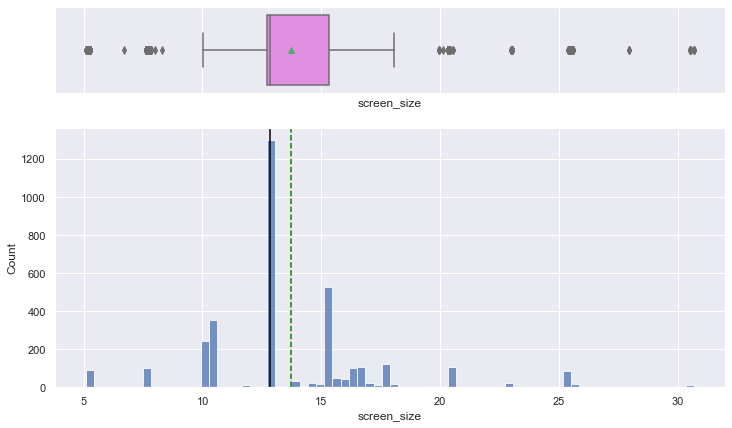

In [24]:
histogram_boxplot(df,"screen_size")

#### Observations:
* Median screen size is around 13cm
* Distribution is right skewed.
* There are outliers on both ends of the distribution.

#### Q2) What percentage of the used device market is dominated by Android devices?

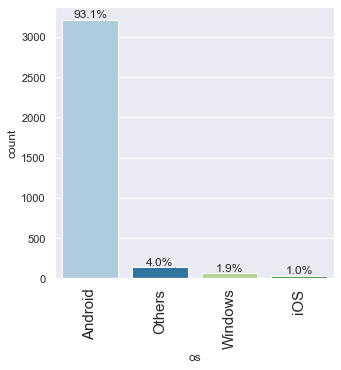

In [25]:
labeled_barplot(df,"os",True)

#### Observations:
* 93.1% of devices us Android

### Bivariate Analysis

#### Q3) The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

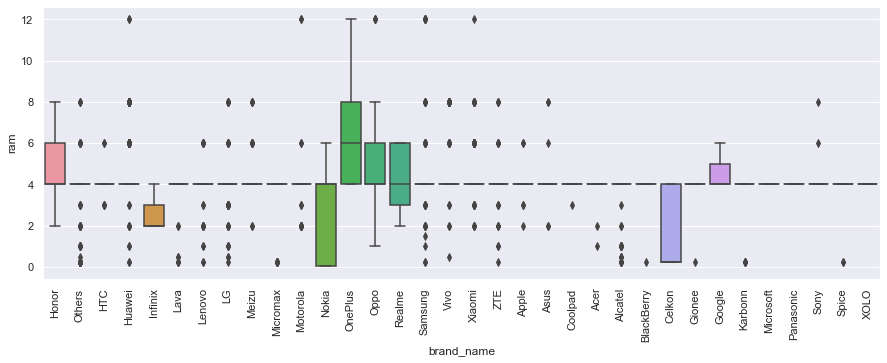

In [26]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Observations
* Most brand names focus on producing devices with ram 4. However there are many outliers.
* Nokia, OnePlus, and Celkon produce the widest range of rams.

#### Q4) A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [27]:
df_large_battery = df[df.battery > 4500]

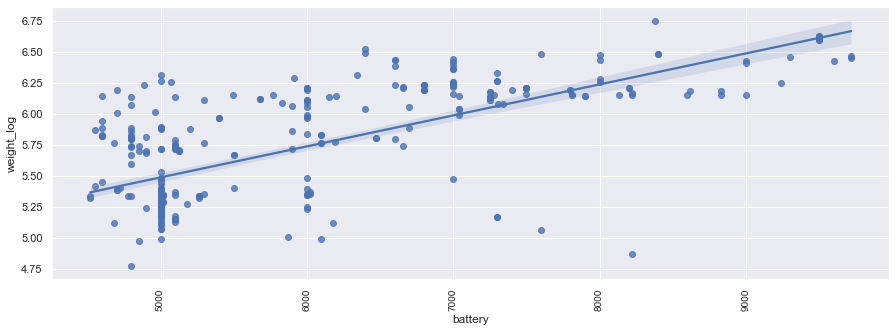

In [28]:
plt.figure(figsize=(15, 5))
sns.regplot(data=df_large_battery, x="battery",y="weight_log")
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### Observations
* There is a positive correlation between weight and battery. Generally, devices which weight more have a battery with more mAh. This might be because batteries with more mAh are heavier. However there are a few outliers.
* Most devices have a battery of 7000 mAh or less.

#### Comparing battery and screen size

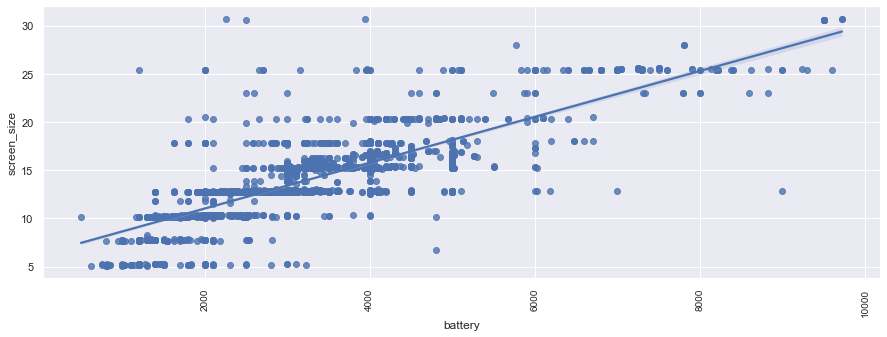

In [29]:
plt.figure(figsize=(15, 5))
sns.regplot(data=df, x="battery",y="screen_size")
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### Observations
* There is a positive correlation between screen size and battery. Generally, devices with a larger screen have a battery with more mAh. This might be because batteries with more mAh are required for larger devices. However there are a few outliers.

#### Q5) Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

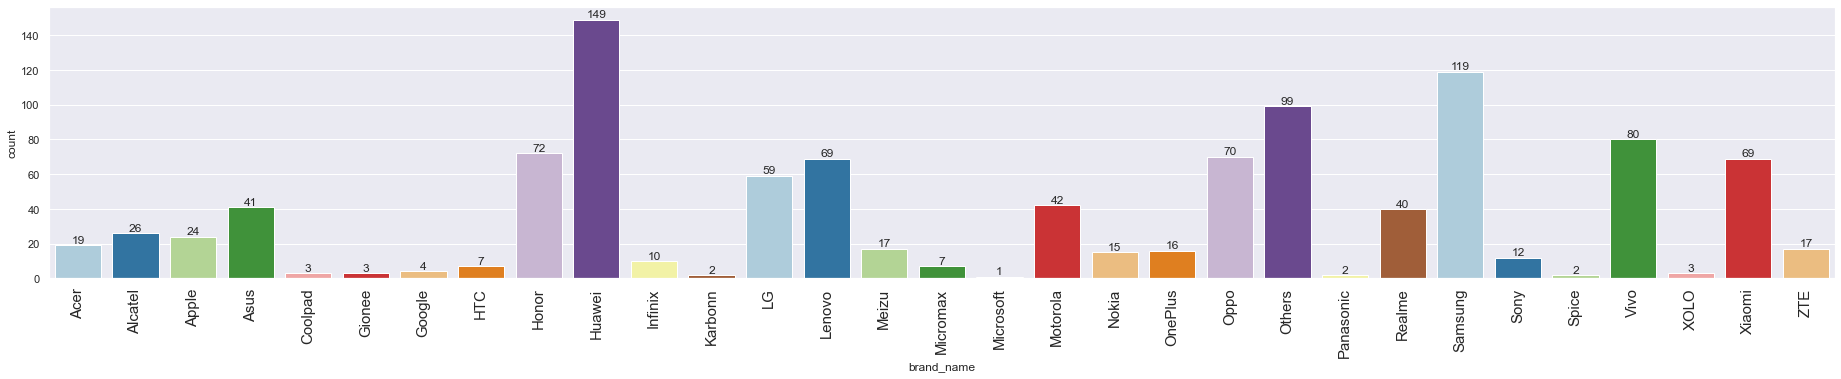

In [30]:
df_large_screen = df[df.screen_size > 6 * 2.54]
labeled_barplot(df_large_screen, "brand_name")

In [31]:
df_large_screen.shape

(1099, 16)

#### Observations
* There are 1099 devices with a screen size larger than 6 inches
* Huawei has the most devices with a screen size larger than 6 inches. 149 devices

#### Q6) A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

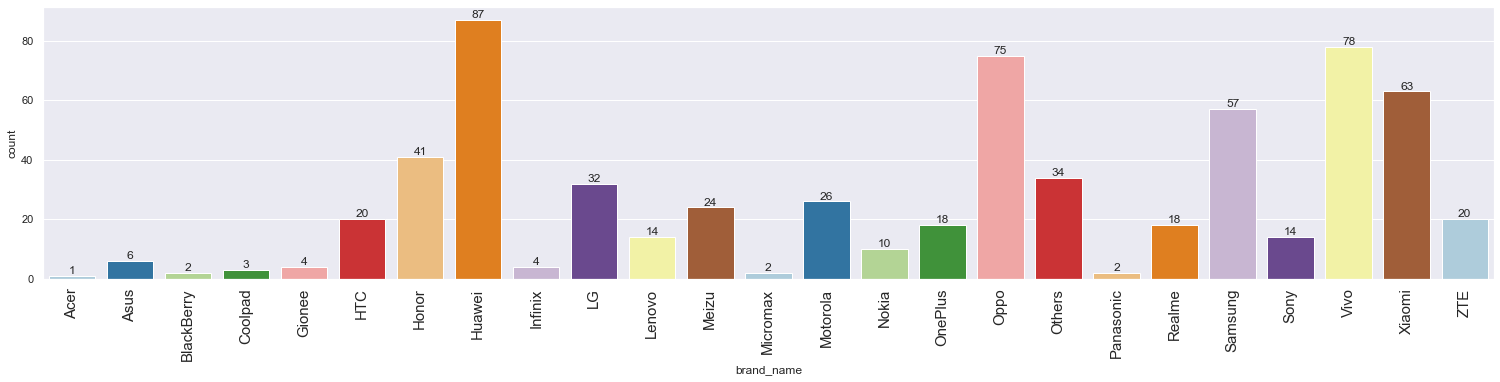

In [32]:
df_selfie_8MP = df[df["selfie_camera_mp"]>8]
labeled_barplot(df_selfie_8MP, "brand_name")

#### Observations
* The brands that offer the most selfie cameras > 8MP are Huawei (87), Vivo (78), and Oppo (75).
* The brands that offer the least selfie cameras > 8MP are Acer (1), BlackBerry (2), Micromax (2), and Panasonic (2)

#### Comparing Brand name with Main Cam

In [33]:
#Let's observe the data for the upper quartile and greater.
df["main_camera_mp"].quantile(0.75)

13.0

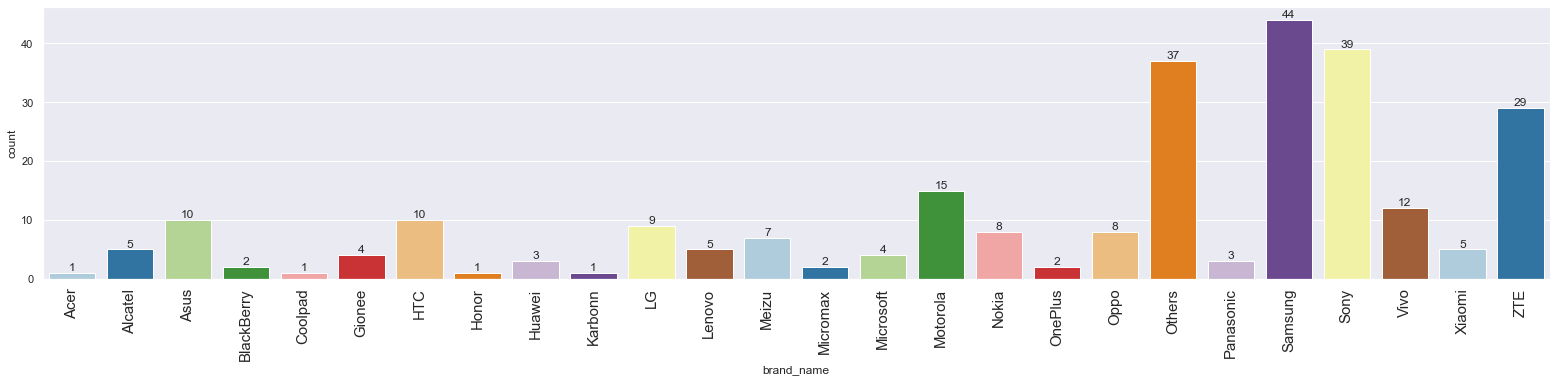

In [34]:
df_main_cam_8MP = df[df["main_camera_mp"]>13]
labeled_barplot(df_main_cam_8MP, "brand_name")

#### Observations
* The brands that offer the most main cameras > 13MP are Samsung (44), and Sony (39).
* The brands that offer the least main cameras > 13MP are Acer (1), Coolpad (1), Honor (1), and Karbonn (1).

#### Q7) Which attributes are highly correlated with the normalized price of a used device?

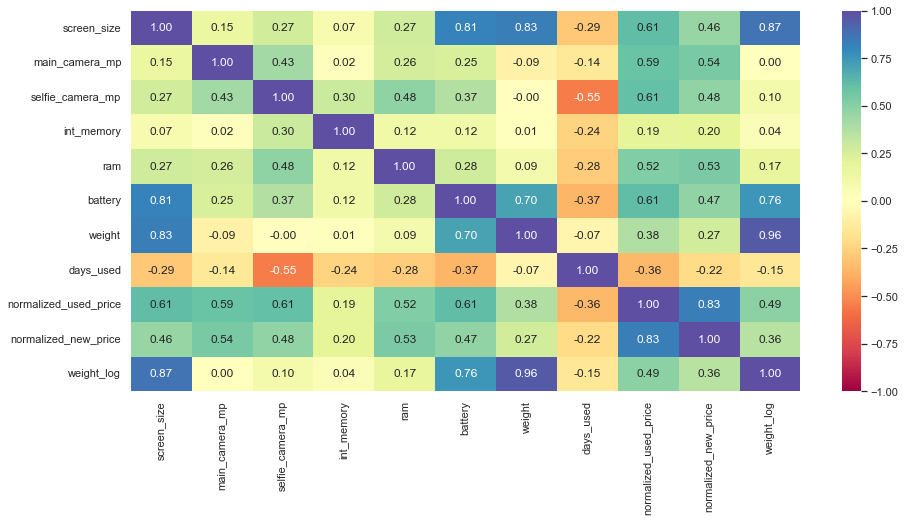

In [35]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* The attribute that is highly correlated with the normalized price of a used device is normalized new price(0.83)  
* 0.87 correlation between screen size and weight (log)
* 0.81 correlation between battery and screen size

#### Comparing Year with Ram

<AxesSubplot:xlabel='release_year', ylabel='ram'>

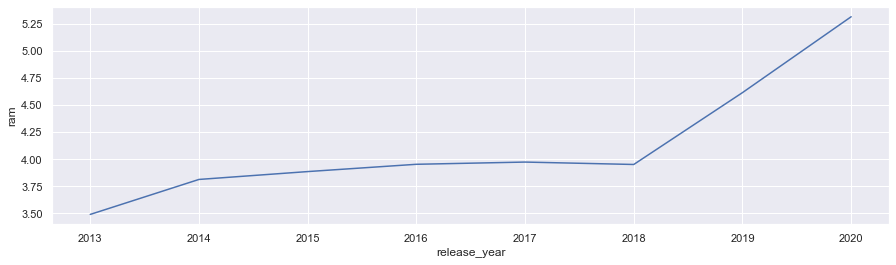

In [36]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df,x="release_year",y="ram",ci=None)

#### Observations:
* Amount of ram in devices has been growing year on year.
* Large increase in amount of ram in devices after 2018. 

#### Comparing Year with Battery

<AxesSubplot:xlabel='release_year', ylabel='battery'>

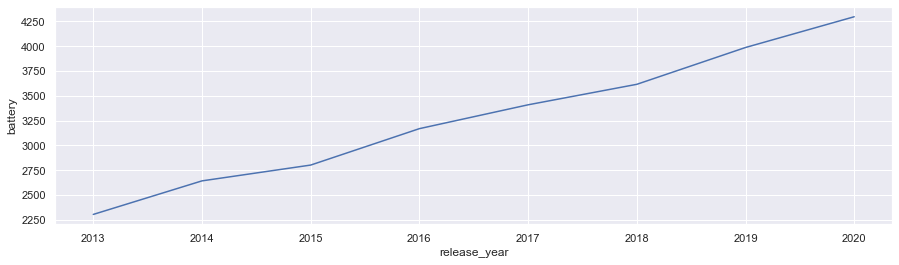

In [37]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df,x="release_year",y="battery",ci=None)

#### Observations:
* Energy capacity of the device battery has been growing year on year

#### Comparing 4G with new and used phone prices

<AxesSubplot:xlabel='4g', ylabel='normalized_used_price'>

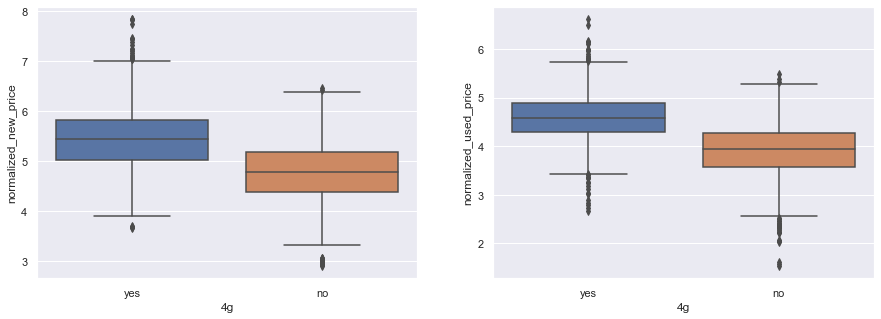

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_new_price")

plt.subplot(122)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

#### Observations:
* Median prices are greater for devices with 4G versus no 4G.
* There are outliers for all the boxplots.

#### Comparing 5G with new and used phone prices

<AxesSubplot:xlabel='5g', ylabel='normalized_used_price'>

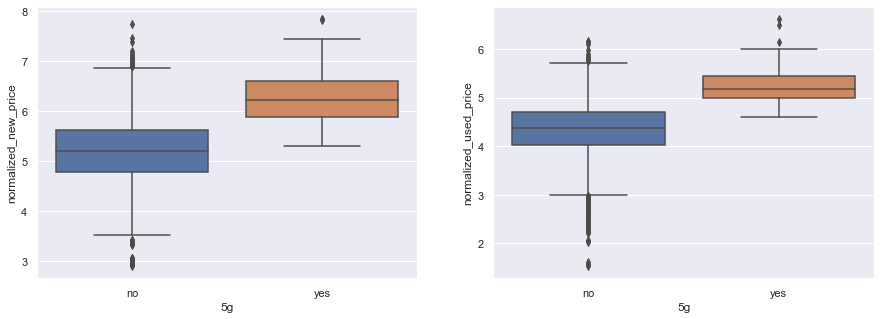

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=df, x="5g", y="normalized_new_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

#### Observations:
* Median prices are greater for devices with 5G versus no 5G.
* The price range for devices that do not have 5G is wider then the price range for devices with 5G.
* There are outliers for all the boxplots.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [40]:
# checking for missing values in the data.
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

* There are a few missing values
* Main camera mp has the most missing values. With 179

In [41]:
#fill missing values by the median values grouped by Year of release and Brand name

df1 = df.copy()

df1[["main_camera_mp", "selfie_camera_mp","int_memory","ram","battery","weight","weight_log"]] = df1.groupby(["release_year","brand_name"])[["main_camera_mp", "selfie_camera_mp","int_memory","ram","battery","weight","weight_log"]].transform(lambda x: x.fillna(x.median()))

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

In [42]:
#fill the remaining missing values grouped by Brand name

df1[["main_camera_mp", "selfie_camera_mp","battery","weight","weight_log"]] = df1.groupby(["brand_name"])[["main_camera_mp", "selfie_camera_mp","battery","weight","weight_log"]].transform(lambda x: x.fillna(x.median()))

df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
weight_log                0
dtype: int64

In [43]:
#fill the remaining missing values for main camera mp using the column median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
df1[numeric_columns] = df1[numeric_columns].apply(medianFiller, axis=0)

df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

#### Feature Engineering
* We will create a new variable called years_since_release which will calculate how long the device has existed since the data was collected. The data was collected in 2021.
* We will then remove the release_year column

In [44]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop(["release_year"], axis=1, inplace=True)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,weight_log,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,4.983607,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,5.361292,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,5.361292,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,6.173786,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,5.220356,1


#### Outlier detection and treatment

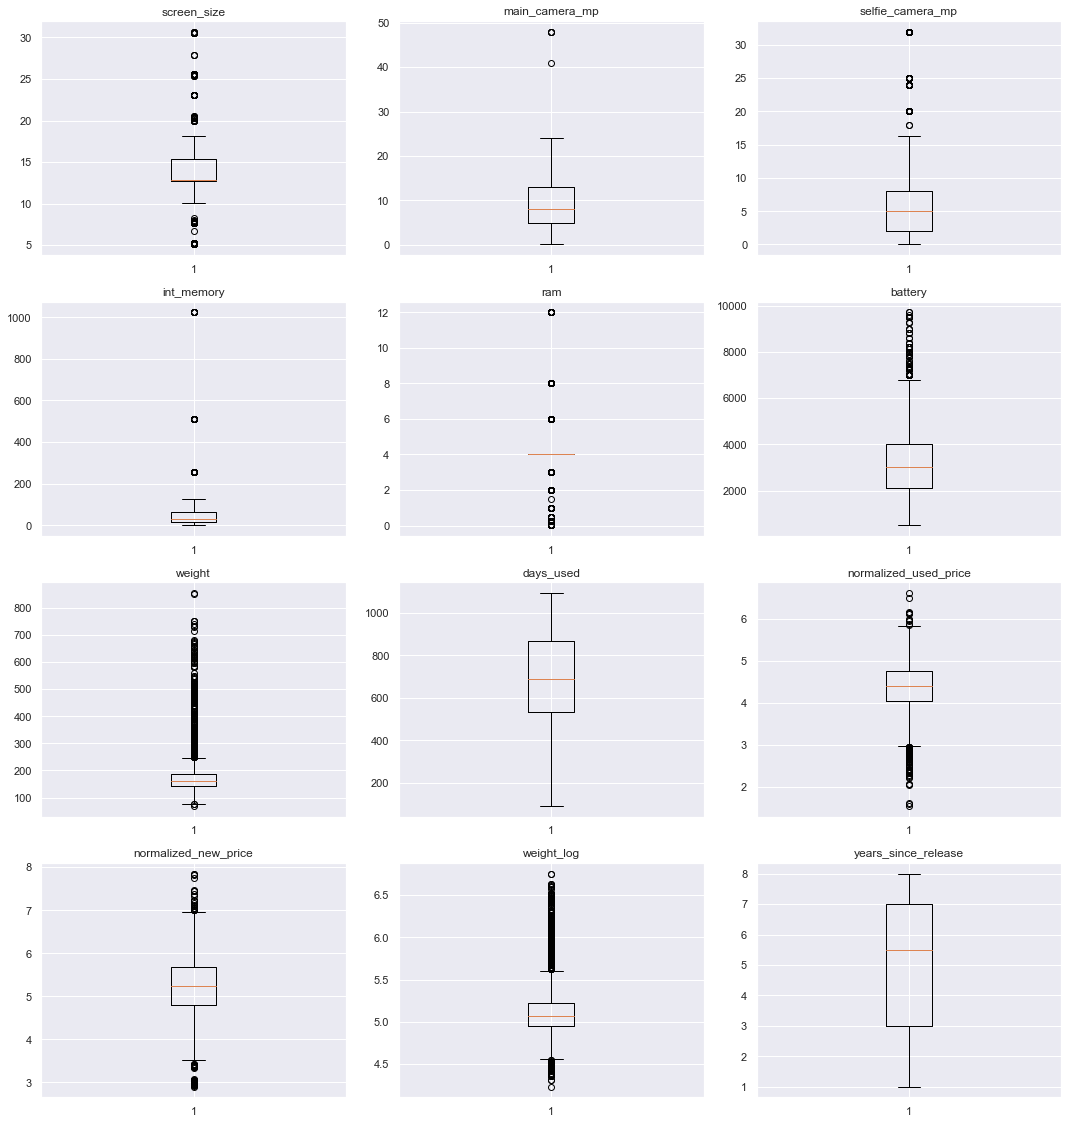

In [45]:
# creating a list of non-tag columns
out_cols = [
    item for item in df1.select_dtypes(include=np.number).columns if "tag" not in item
]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Some of the columns do have outliers in them.
- We will treat these outliers by flooring and capping, i.e., we will replace the
    - lower outliers by Q1 - 1.5IQR.
    - upper outliers by Q3 + 1.5IQR.
- We will not treat the target variable. Which is normalized price of used devices.
- We will not treat the discret variables. Which is ram and int_memory
- We will not treat outliers in the weight_log column as doing so will remove the variation in the column and most likely make it a constant, which is not desirable.

In [46]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [47]:
treat_out_cols = ["screen_size","main_camera_mp","selfie_camera_mp","battery","weight","normalized_new_price"]

df2 = treat_outliers_all(df1, treat_out_cols)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  weight_log             3454 non-null   float64
 15  year

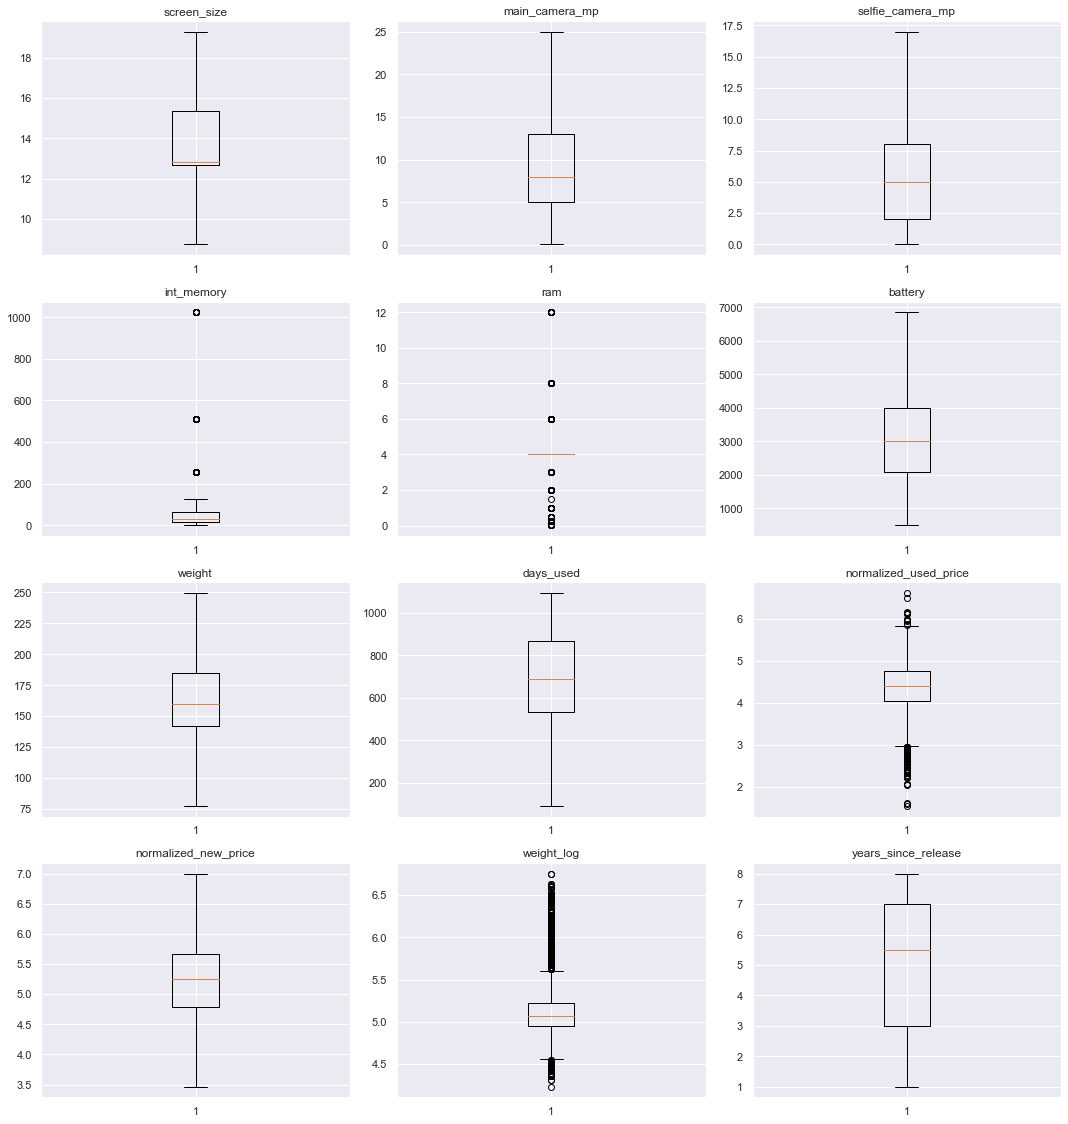

In [49]:
plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers were treated.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [50]:
# rechecking column datatypes and number of non-null values
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0


* Slight changes in the mean and std values
* Min and max values have changed given that outliers where removed

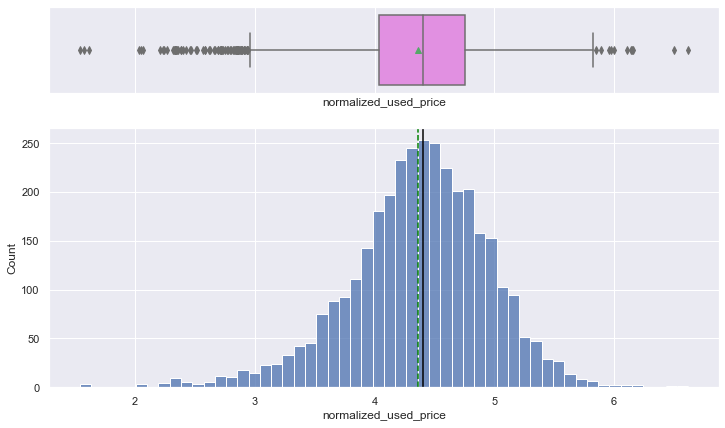

In [51]:
#normalized used price
histogram_boxplot(df2,"normalized_used_price")

#### Observations:
* No change

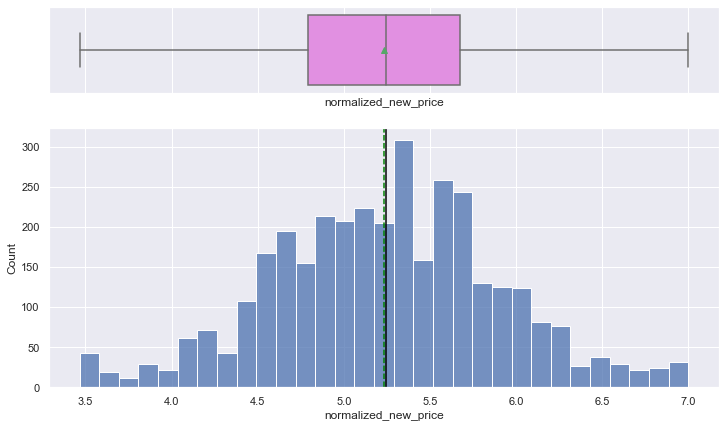

In [52]:
#normalized new price
histogram_boxplot(df2,'normalized_new_price')

#### Observations:
* Median remains the same.
* Standard deviation is smaller.
* There are outliers no more outliers.

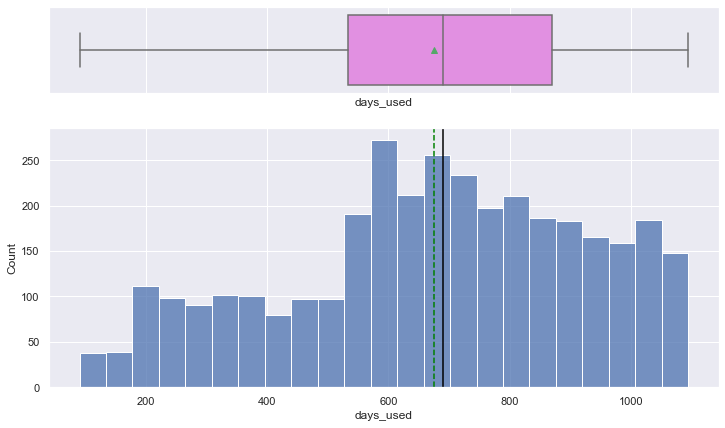

In [53]:
#Days used
histogram_boxplot(df2,'days_used')

#### Observations:
* No change

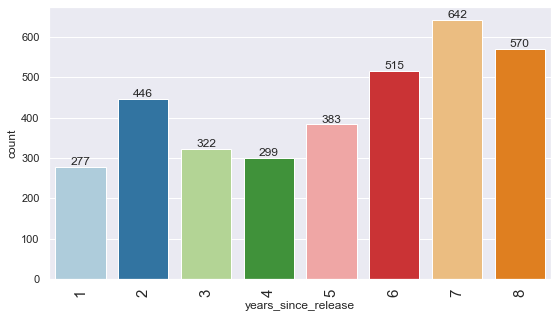

In [54]:
#Years since release
labeled_barplot(df2,"years_since_release")

#### Observations:
* No change
* Note: graph is in reverse order given that we changed the attributes from release year to years since release

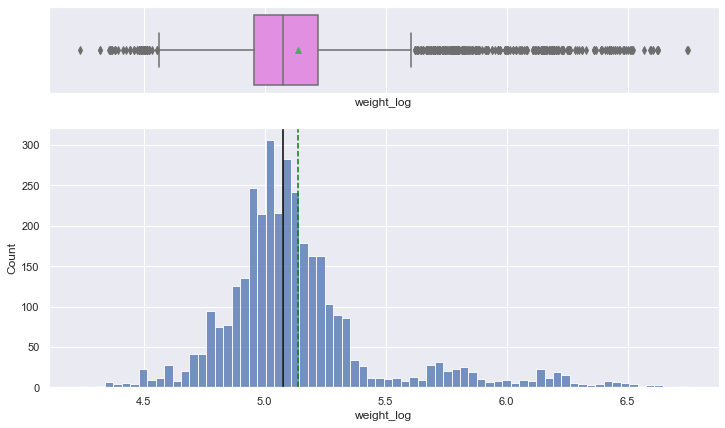

In [55]:
#Weight logged
histogram_boxplot(df2,"weight_log")

#### Observations:
* No change

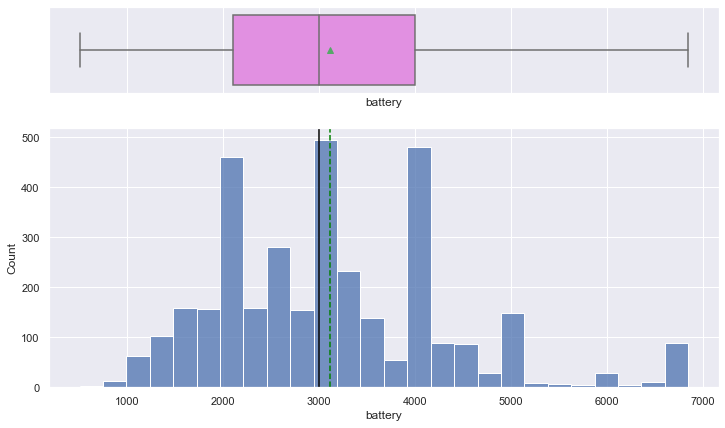

In [56]:
#Battery
histogram_boxplot(df2,'battery')

#### Observations:
* Median remains the same.
* Standard deviation is smaller.
* There are outliers no more outliers.

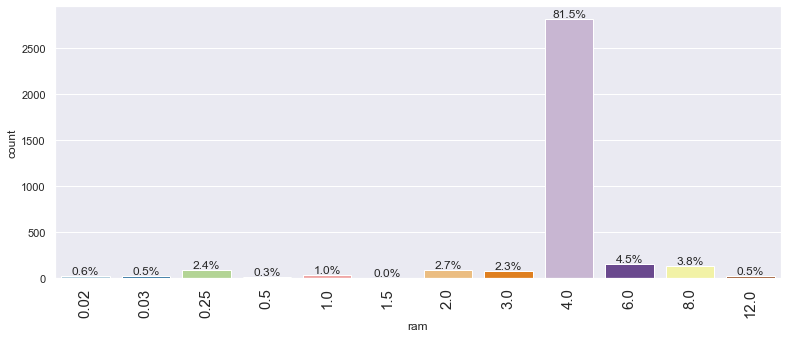

In [57]:
#Ram
labeled_barplot(df2,"ram",True)

#### Observations:
* No change

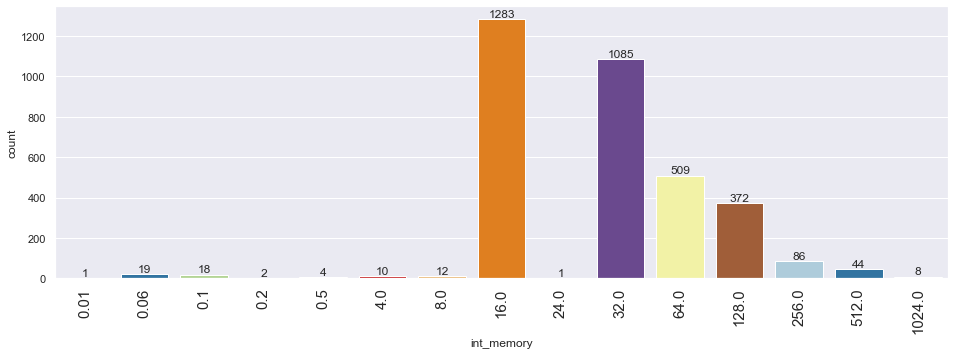

In [58]:
#internal memory
labeled_barplot(df2,'int_memory')

#### Observations:
* No change

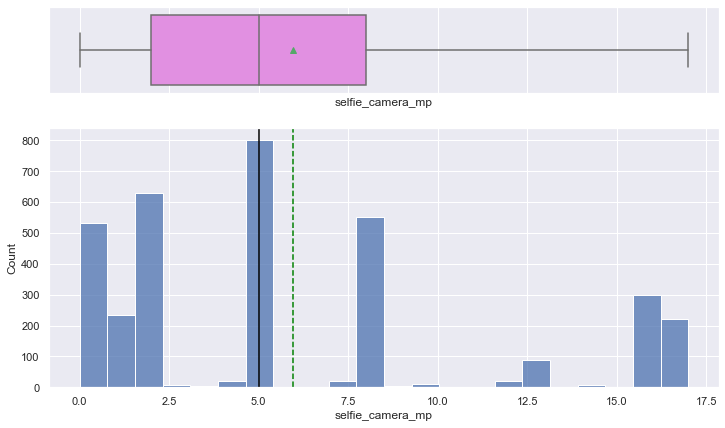

In [59]:
#selfie camera mp
histogram_boxplot(df2,"selfie_camera_mp")

#### Observations:
* Median remains the same
* Standard deviation is smaller.
* There are outliers no more outliers.

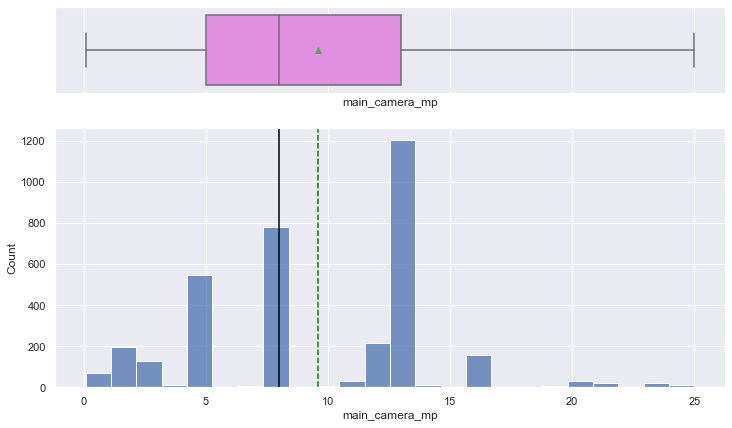

In [60]:
#Main camera mp
histogram_boxplot(df2,"main_camera_mp")

#### Observations:
* Median remains the same
* Standard deviation is smaller.
* There are outliers no more outliers.

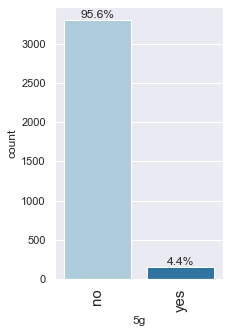

In [61]:
#5G
labeled_barplot(df2,"5g",True)

#### Observations:
* No change

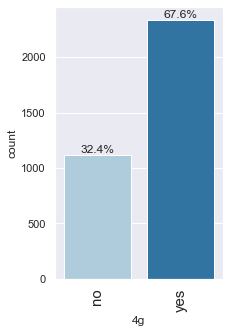

In [62]:
#4G
labeled_barplot(df2,"4g",True)

#### Observations:
* No change

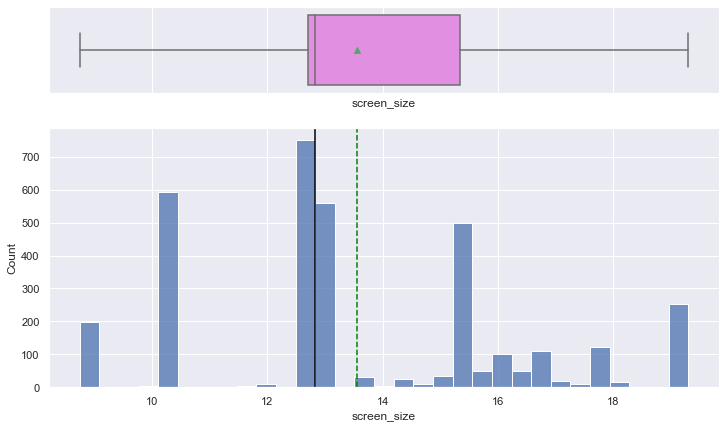

In [63]:
#screen size
histogram_boxplot(df2,"screen_size")

#### Observations:
* Median remains the same
* Standard deviation is smaller.
* There are outliers no more outliers.

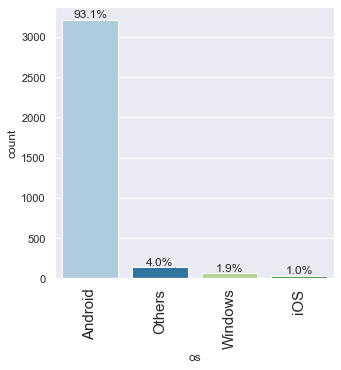

In [64]:
#os
labeled_barplot(df2,"os",True)

#### Observations:
* No change

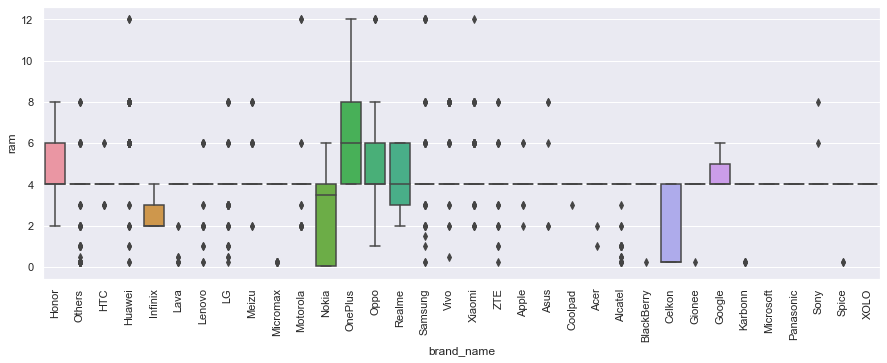

In [65]:
#Comparing ram and brand name
plt.figure(figsize=(15, 5))
sns.boxplot(data=df2, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Observations:
* No change

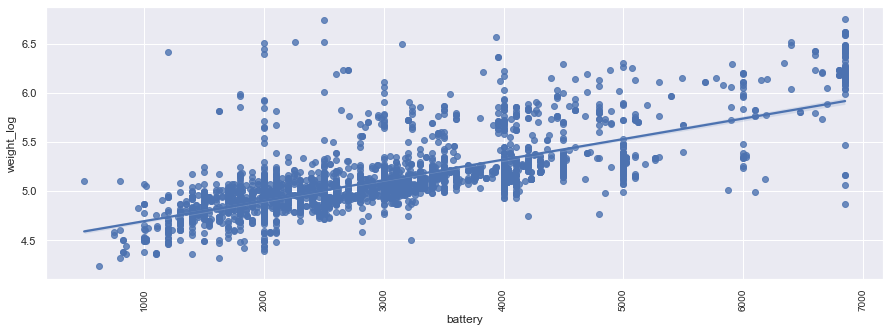

In [66]:
# Comparing weight and battery
plt.figure(figsize=(15, 5))
sns.regplot(data=df2, x="battery",y="weight_log")
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### Observations
* There is a positive correlation between weight and battery. Same as before.

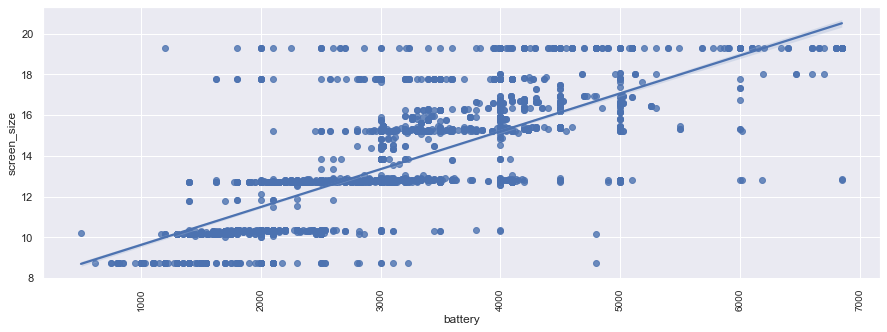

In [67]:
#Comparing battery and screen size
plt.figure(figsize=(15, 5))
sns.regplot(data=df2, x="battery",y="screen_size")
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### Observations
* There is a positive correlation between screen size and battery. Same as before.

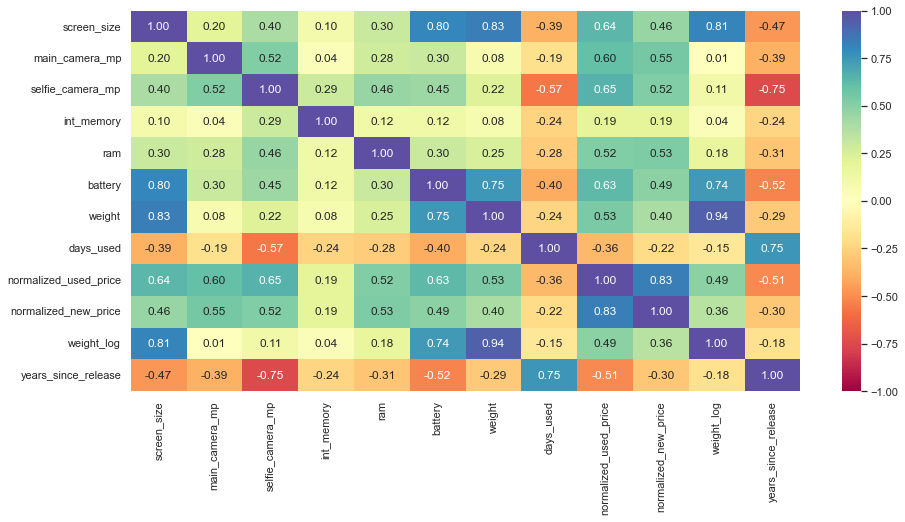

In [68]:
cols_list = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* Negative relationship between years since release and selfie camera mp
* Slight changes in the other relationships, but nothing significant

<AxesSubplot:xlabel='years_since_release', ylabel='battery'>

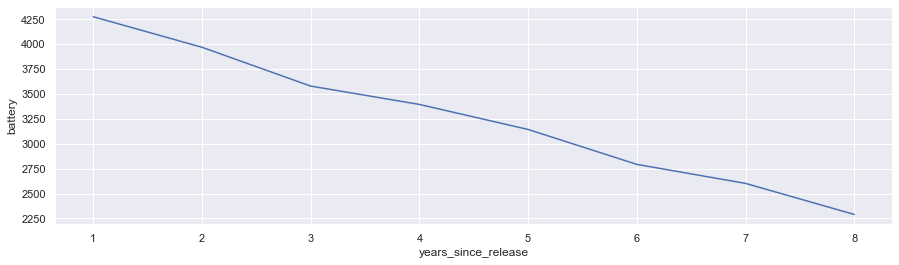

In [69]:
#Comparing battery and years since release
plt.figure(figsize=(15, 4))
sns.lineplot(data=df2,x="years_since_release",y="battery",ci=None)

#### Observations:
* No change except the graph is inversed given that we changed the release year attribute to years since release

<AxesSubplot:xlabel='4g', ylabel='normalized_used_price'>

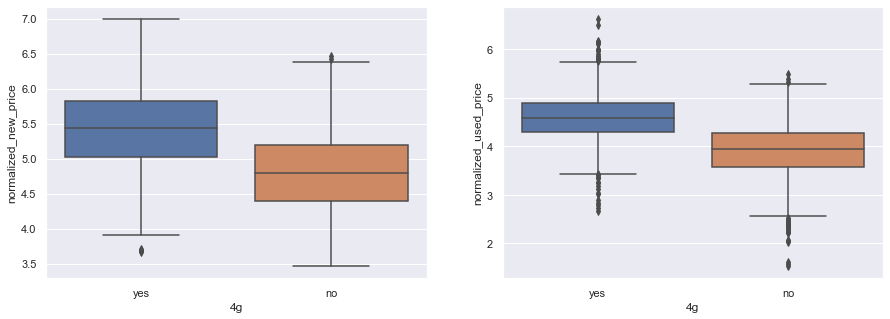

In [70]:
#Comparing 4G with new and used phone prices
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=df2, x="4g", y="normalized_new_price")

plt.subplot(122)
sns.boxplot(data=df2, x="4g", y="normalized_used_price")

#### Observations:
* Median prices are greater for devices with 4G versus no 4G. Same as before.
* A few outliers for normalized new price remain. 

<AxesSubplot:xlabel='5g', ylabel='normalized_used_price'>

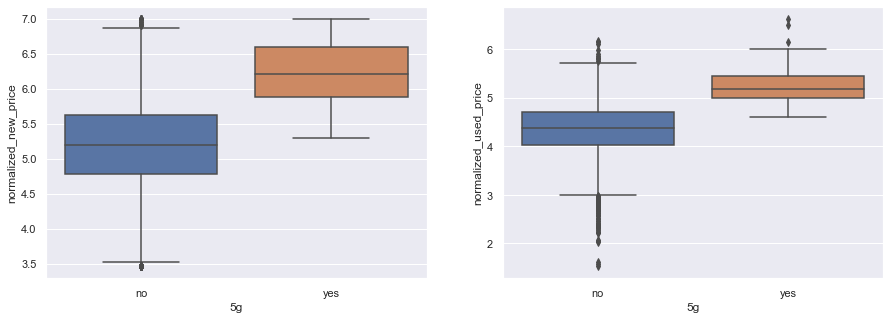

In [71]:
#Comparing 5G with new and used phone prices
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=df2, x="5g", y="normalized_new_price")

plt.subplot(122)
sns.boxplot(data=df2, x="5g", y="normalized_used_price")

#### Observations:
* Median prices are greater for devices with 5G versus no 5G. Same as before.
* A few outliers for normalized new price remain. 

## Building a Linear Regression model

In [72]:
# define dependent variable
X = df2.drop(["normalized_used_price"], axis=1)
y = df2["normalized_used_price"]

In [73]:
# Add the intercept to data
X = sm.add_constant(X)

C:\Users\jwellian.IOF\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,249.5,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [76]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     262.9
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           15:08:17   Log-Likelihood:                 123.02
No. Observations:                   2417   AIC:                            -146.0
Df Residuals:                       2367   BIC:                             143.5
Df Model:                             49                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations:
* Adjusted r-squared is 0.842. This is a high correlation for the data.

## Model performance evaluation

Check the performance of the model using different metrics.

In [77]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [78]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229963,0.179057,0.844779,0.841499,4.309853


In [79]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239765,0.185146,0.840614,0.832532,4.523526


#### Observations:
* The adjusted r-squared, RMSE and MAE for the training performance and the test performance are very similiar. This means that the model is not overfitting or underfitting.
* MAE suggests that the model can predict normalized used price within a mean error of 0.19 euros on the test data.
* MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### Test for multicollinearity

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [81]:
checking_vif(x_train)

,feature,VIF
0,const,1699.499994
1,screen_size,5.703009
2,main_camera_mp,2.504404
3,selfie_camera_mp,3.731462
4,int_memory,1.354413
5,ram,2.245091
6,battery,4.139091
7,weight,11.929842
8,days_used,2.662272
9,normalized_new_price,3.293496


#### Observations:
* Some of the attributes have moderate and high multicollinearity (greater than 5).
* We will therefore remove multicollinearity where necessary.

In [82]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [83]:
col_list = [
    "screen_size",
    "weight",
    "weight_log",
    "years_since_release",
    "brand_name_Apple",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
    "os_iOS",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.841633,0.232330
1,brand_name_Samsung,0.841628,0.232334
2,brand_name_Others,0.841624,0.232336
3,brand_name_Apple,0.841529,0.232406
4,os_iOS,0.841496,0.232430
5,years_since_release,0.840985,0.232805
6,screen_size,0.837627,0.235250
7,weight_log,0.835345,0.236897
8,weight,0.832638,0.238836


#### Observations:
* Dropping weight would have the maximum impact on the model.
* We will drop brand_name_Huawei and check again.

In [84]:
col_to_drop = "brand_name_Huawei"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,1638.399334
1,screen_size,5.699574
2,main_camera_mp,2.503391
3,selfie_camera_mp,3.726343
4,int_memory,1.352663
5,ram,2.245086
6,battery,4.138679
7,weight,11.928288
8,days_used,2.661380
9,normalized_new_price,3.293486


* Dropping brand name Huawei has brought the VIF of brand name Others and brand name Samsung below 5.

In [85]:
col_list = [
    "screen_size",
    "weight",
    "weight_log",
    "years_since_release",
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841590,0.232361
1,os_iOS,0.841563,0.232381
2,years_since_release,0.841052,0.232756
3,screen_size,0.837694,0.235201
4,weight_log,0.835414,0.236847
5,weight,0.832708,0.238787


#### Observations:
* Dropping weight would have the maximum impact on the model.
* We will drop brand_name_Apple and check again.

In [86]:
col_to_drop = "brand_name_Apple"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,1602.128298
1,screen_size,5.694347
2,main_camera_mp,2.501591
3,selfie_camera_mp,3.684171
4,int_memory,1.352621
5,ram,2.235403
6,battery,4.138612
7,weight,11.805809
8,days_used,2.660414
9,normalized_new_price,3.260056


* Dropping brand name Apple has brought the VIF of os_iOS below 5.

In [87]:
col_list = [
    "screen_size",
    "weight",
    "weight_log",
    "years_since_release",
]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.840953,0.232828
1,screen_size,0.837690,0.235205
2,weight_log,0.835041,0.237116
3,weight,0.832332,0.239055


#### Observations:
* Dropping weight would have the maximum impact on the model.
* We will drop years since release and check again.

In [88]:
col_to_drop = "years_since_release"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,1595.689273
1,screen_size,5.589478
2,main_camera_mp,2.492728
3,selfie_camera_mp,3.061167
4,int_memory,1.341040
5,ram,2.234681
6,battery,4.020343
7,weight,11.760660
8,days_used,1.954925
9,normalized_new_price,2.970108


* No impact on the other attributes
* We will drop screen size

In [89]:
col_to_drop = "screen_size"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,1572.634085
1,main_camera_mp,2.491839
2,selfie_camera_mp,2.985395
3,int_memory,1.339985
4,ram,2.232179
5,battery,3.797447
6,weight,11.277462
7,days_used,1.903653
8,normalized_new_price,2.969767
9,weight_log,12.636394


* No impact on the other attributes
* We will drop weight and keep weight_log

In [90]:
col_list = [
    "weight",
    "weight_log",
]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight_log,0.835041,0.237116
1,weight,0.832332,0.239055


#### Observations:
* Dropping weight would have the maximum impact on the model. However if we drop weight_log and not weight, we will have a attribute that is not normalized and therefore might destort the model. We will therefore remove weight and weight_log altogether.

In [91]:
col_to_drop = "weight"
x_train6 = x_train5.loc[:, ~x_train5.columns.str.startswith(col_to_drop)]
x_test6 = x_test5.loc[:, ~x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,147.024690
1,main_camera_mp,2.329196
2,selfie_camera_mp,2.884393
3,int_memory,1.334658
4,ram,2.228726
5,battery,1.726702
6,days_used,1.883671
7,normalized_new_price,2.808916
8,brand_name_Alcatel,1.437189
9,brand_name_Asus,1.365976


- **The above predictors have no multicollinearity and the assumption is satisfied.**

#### Dealing with high p-values

In [92]:
olsmod1 = sm.OLS(y_train, x_train6).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.812
Model:                               OLS   Adj. R-squared:                  0.808
Method:                    Least Squares   F-statistic:                     237.7
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           15:08:19   Log-Likelihood:                -111.23
No. Observations:                   2417   AIC:                             310.5
Df Residuals:                       2373   BIC:                             565.2
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations:
* Adjusted r-squared has dropped from 0842 to 0.808 after the multicollinearity check. 0.808 nevertheless remains high.
* There are a few p-values which are greater than 0.05. We will therefore deal with these values.

In [93]:
# initial list of columns
cols = x_train6.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train6[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'normalized_new_price', 'brand_name_Alcatel', 'brand_name_Honor', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Microsoft', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others']


In [94]:
x_train7 = x_train6[["const"] + selected_features]
x_test7 = x_test6[["const"] + selected_features]

In [95]:
olsmod2 = sm.OLS(y_train, x_train7).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.810
Model:                               OLS   Adj. R-squared:                  0.808
Method:                    Least Squares   F-statistic:                     785.5
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           15:08:19   Log-Likelihood:                -124.41
No. Observations:                   2417   AIC:                             276.8
Df Residuals:                       2403   BIC:                             357.9
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Now no feature has a p-value greater than 0.05, so we'll consider the features in *x_train7* as the final set of predictor variables and *olsmod2* as final model.**

#### Test for linearity and independence

In [96]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.871046,0.216442
1525,4.448399,4.655350,-0.206950
1128,4.315353,4.347275,-0.031923
3003,4.282068,4.304494,-0.022426
2907,4.456438,4.492274,-0.035836


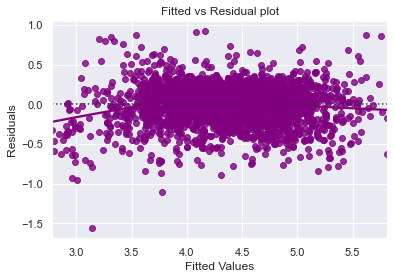

In [97]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

#### Test for normality

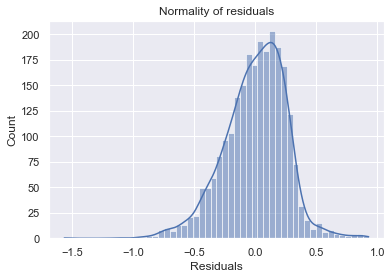

In [98]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

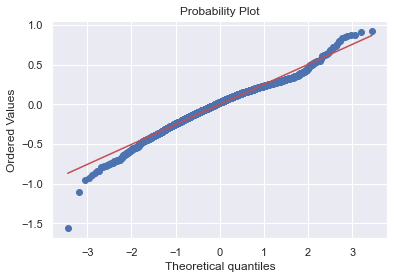

In [99]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [100]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9803774356842041, pvalue=9.370273027679258e-18)

* p-value <0.05
* The assumption is satisfied.

#### Test for homoscedasticity

In [101]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5)
lzip(name, test)

[('F statistic', 1.0408938701337824), ('p-value', 0.24726847476747932)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**
* All assumptions are satisfied.

## Final Model Summary

In [102]:
# predictions on the test set
pred = olsmod2.predict(x_test7)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.348913
2341,3.696103,4.005014
1913,3.592093,3.827705
688,4.306495,4.027569
650,4.522115,5.137360
2291,4.259294,4.356304
40,4.997685,5.314469
1884,3.875359,4.139548
2538,4.206631,4.062677
45,5.380450,5.346631


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

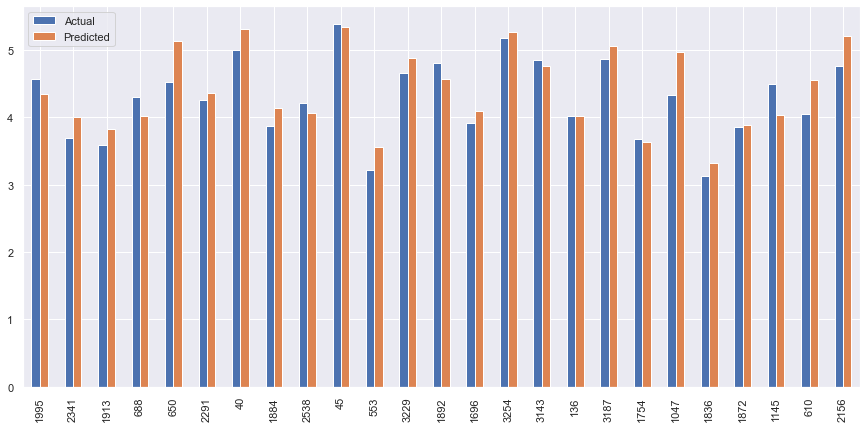

In [103]:
#Sample of 25 records
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

In [104]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train7, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.254752,0.198265,0.809511,0.808321,4.780703


In [105]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test7, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.258557,0.198279,0.81465,0.811927,4.863113


#### Observations:
* The adjusted r-squared, RMSE and MAE for the training performance and the test performance are very similiar. This means that the model is not overfitting or underfitting.
* MAE suggests that the model can predict normalized used price within a mean error of 0.20 euros on the test data.
* MAPE of 4.8 on the test data means that we are able to predict within 4.8% of the normalized used price.
* Hence, we can conclude the model olsmod2 is good for predicition as well as inference purposes.

In [106]:
#Comparing initial model created with sklearn and the final statsmodels model
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.229963,0.254752
MAE,0.179057,0.198265
R-squared,0.844779,0.809511
Adj. R-squared,0.841499,0.808321
MAPE,4.309853,4.780703


In [107]:
# test performance comparison

models_test_comp_df = pd.concat(
    [olsmodel_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.239765,0.258557
MAE,0.185146,0.198279
R-squared,0.840614,0.814650
Adj. R-squared,0.832532,0.811927
MAPE,4.523526,4.863113


* The performance of the two models are close to each other

In [108]:
#Final model
olsmodel_final = sm.OLS(y_train, x_train7).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.810
Model:                               OLS   Adj. R-squared:                  0.808
Method:                    Least Squares   F-statistic:                     785.5
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           15:08:22   Log-Likelihood:                -124.41
No. Observations:                   2417   AIC:                             276.8
Df Residuals:                       2403   BIC:                             357.9
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Actionable Insights

#### Observations from EDA:

- Normalized used price: Target variable is normaliy distributed with a slight left tail. There are outliers on both ends of the box plot.
- Release year: most devices where released in 2014. The fewest was in 2020.
- Weight: distribution has heavily right skewed. A log transformation was used before modelling. 
- 4G & 5G: 67.6% of devices have 4G. 4.4% of devices have 5G. 28% of devices have neither. Devices with 4G are generally priced higher then devices without 4G. Devices with 5G are generally priced higher than devices without 5G.
- os: device market is dominated by Android. 93.1%
- ram: all brands use 4.0 ram. However some brands also produce devices with a different ram.
- Battery: is positively correlated with weight_log (0.76) and screen size (0.81). 
- Screen size: Huawei has the most devices with a large screen (larger than 6 inches).
- Selfie cam: Huawei offers the most selfie cameras which are 8 megapixels or more.
- Main cam: Samsung offers the most main camers which are 13 megapixels or more.
- Timeline: The amount of ram in devices and the mHa of batteries has been growing year on year.

#### Modelling:

- The adjusted r-squared for the train and test models are 0.81 and 0.81, indicating that the model explains 81% of the total variation in the train and test sets respectively. Also, both scores are comparable.
- RMSE values on the train and test sets are also comparable. This shows that the model is not overfitting or underfitting.
- MAE suggests that the model can predict normalized used price within a mean error of 0.20 euros on the test data.
- MAPE of 4.8 on the test data means that we are able to predict within 4.8% of the normalized used price.

## Recommendations

- Based on the model, the components that affect price of a used phone/tablet are the following:
        - The main camera
        - The selfie camera
        - Ram
        - Battery in mAh
        
- Therefore, devices with these 4 components in excellent quality (undamaged/refurbished) will encourage customers to pay a higher price. 